In [ ]:
# Issue topic: Skeletonising horse image from sample code example in 'skimage' tool or scikit-image tool: https://scikit-image.org/docs/0.25.x/auto_examples/edges/plot_skeleton.html

# Issue description: https://github.com/neuroinformatics-unit/osw25-hackday/issues/7

In [3]:
# Importing libraries (for computation and graph plotting) and sample data

from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
%matplotlib widget
import numpy as np

In [4]:
# Worm image:

# Reading/Importing the 'masked' worm image
from PIL import Image

# Open the image
img = Image.open("/Users/jyotibhogal/Documents/GitHub/NIU_Open_Software_Week_2025/Day_5/frame0_mask_worm3.tif")

# Display the image
img.show()

In [5]:
# Convert masked worm .tif image to numpy array object
import numpy as np
img_worm = np.array(img)
print(img_worm.shape)
print(img_worm.dtype)
print(img_worm)

(480, 720)
uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [6]:
# Skeletonising the worm
skeleton_worm = skeletonize(img_worm)
print(type(skeleton_worm))
print(skeleton_worm)

<class 'numpy.ndarray'>
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


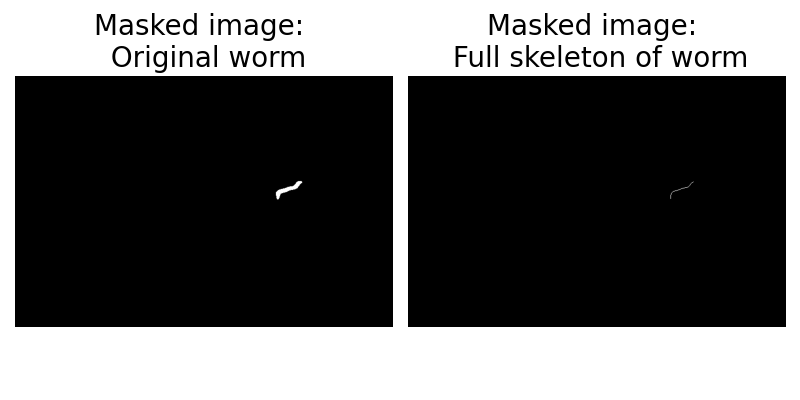

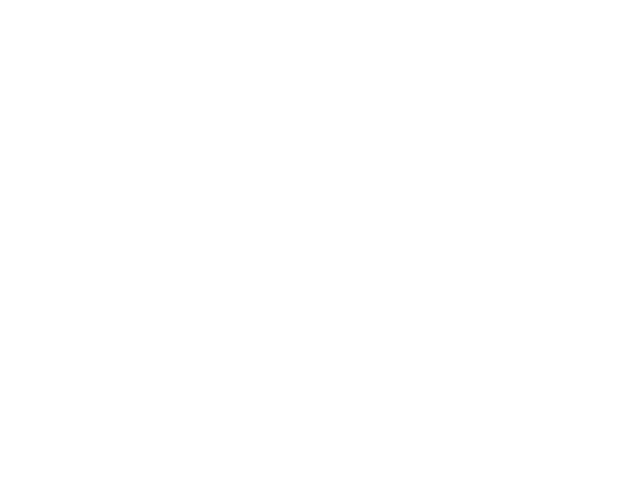

In [7]:
# Visualising the full masked image and the skeleton for worm

plt.figure()
# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharex=True, sharey=True)
ax = axes.ravel()
# Note: Does nothing that is displayed

ax[0].imshow(img_worm, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Masked image: \n Original worm', fontsize=20)

# Repeating the above the steps/cells for image on right
ax[1].imshow(skeleton_worm, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Masked image: \n Full skeleton of worm', fontsize=20)

fig.tight_layout()
plt.show()

In [8]:
np.sum(skeleton_worm)

np.int64(54)

In [9]:
# Extracting nodes for the worm skeleton

worm_index_true = np.argwhere(skeleton_worm)
print(type(worm_index_true))
print(worm_index_true.shape)
print(worm_index_true.dtype)
print(worm_index_true)

# alternative way to view the above information
worm_index_true.view()

<class 'numpy.ndarray'>
(54, 2)
int64
[[203 543]
 [204 541]
 [204 542]
 [205 540]
 [206 539]
 [207 538]
 [208 537]
 [209 537]
 [210 536]
 [211 535]
 [212 534]
 [213 532]
 [213 533]
 [214 527]
 [214 528]
 [214 529]
 [214 530]
 [214 531]
 [215 523]
 [215 524]
 [215 525]
 [215 526]
 [216 520]
 [216 521]
 [216 522]
 [217 518]
 [217 519]
 [218 515]
 [218 516]
 [218 517]
 [219 512]
 [219 513]
 [219 514]
 [220 508]
 [220 509]
 [220 510]
 [220 511]
 [221 505]
 [221 506]
 [221 507]
 [222 504]
 [223 503]
 [224 502]
 [225 501]
 [226 501]
 [227 501]
 [228 500]
 [229 500]
 [230 500]
 [231 500]
 [232 500]
 [233 500]
 [234 500]
 [235 500]]


array([[203, 543],
       [204, 541],
       [204, 542],
       [205, 540],
       [206, 539],
       [207, 538],
       [208, 537],
       [209, 537],
       [210, 536],
       [211, 535],
       [212, 534],
       [213, 532],
       [213, 533],
       [214, 527],
       [214, 528],
       [214, 529],
       [214, 530],
       [214, 531],
       [215, 523],
       [215, 524],
       [215, 525],
       [215, 526],
       [216, 520],
       [216, 521],
       [216, 522],
       [217, 518],
       [217, 519],
       [218, 515],
       [218, 516],
       [218, 517],
       [219, 512],
       [219, 513],
       [219, 514],
       [220, 508],
       [220, 509],
       [220, 510],
       [220, 511],
       [221, 505],
       [221, 506],
       [221, 507],
       [222, 504],
       [223, 503],
       [224, 502],
       [225, 501],
       [226, 501],
       [227, 501],
       [228, 500],
       [229, 500],
       [230, 500],
       [231, 500],
       [232, 500],
       [233, 500],
       [234,

In [11]:
# Step 1: Determine sample size (10%)
sample_size = int(0.1 * len(worm_index_true))
sample_size = max(sample_size, 1)  # ensure at least one point
print(f"Sample size: {sample_size}")

# Step 2: Randomly select without replacement
sample_indices = np.random.choice(len(worm_index_true), size=5, replace=False)
print(f"Sample indices: {sample_indices}")

# Step 3: Extract sampled worm_index_true
sampled_worm_index_true = worm_index_true[sample_indices, :]
print("Shape of Sampled points:\n", sampled_worm_index_true.shape)
print("Indices of Sampled points:\n", sampled_worm_index_true)


# Step 4: Print the sampled points from the skeleton_worm array
nodes = skeleton_worm[sampled_worm_index_true[:,0], sampled_worm_index_true[:,1]]
print("The sampled points are:\n", nodes)
print(nodes.shape)
print(type(nodes))

Sample size: 5
Sample indices: [42  5  4 24 30]
Shape of Sampled points:
 (5, 2)
Indices of Sampled points:
 [[224 502]
 [207 538]
 [206 539]
 [216 522]
 [219 512]]
The sampled points are:
 [ True  True  True  True  True]
(5,)
<class 'numpy.ndarray'>


In [12]:
sum_nodes = np.sum(nodes)
print(f"Sum of sampled skeleton nodes: {sum_nodes}")    

Sum of sampled skeleton nodes: 5


In [13]:
print(sampled_worm_index_true.shape)
print(skeleton_worm.shape)

(5, 2)
(480, 720)


In [14]:
sum_skeleton = np.sum(nodes)
print(f"Sum of sampled skeleton nodes: {sum_skeleton}")

Sum of sampled skeleton nodes: 5


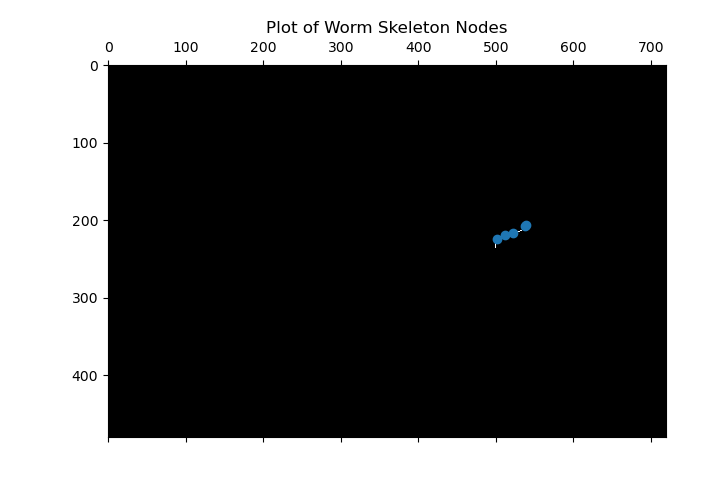

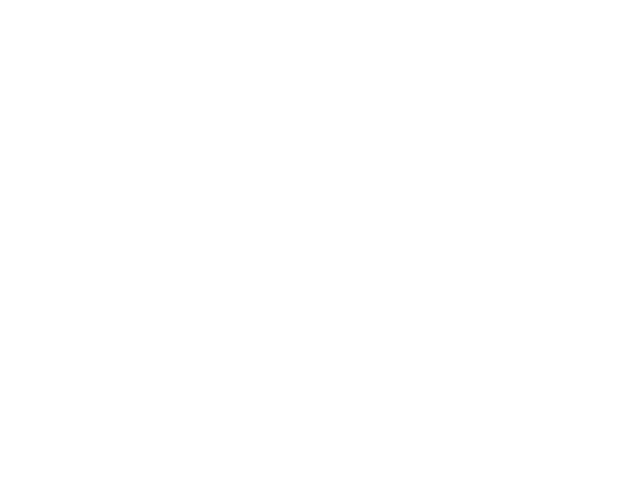

In [15]:
# Scatter plot of nodes of the skeleton of worm
plt.figure()
plt.matshow(skeleton_worm, cmap=plt.cm.gray)
plt.scatter(sampled_worm_index_true[:,1],sampled_worm_index_true[:,0])
plt.title("Plot of Worm Skeleton Nodes")
plt.show()